### Dados

In [24]:
train_path = 'avi_lic_train.txt'
f = open(train_path, mode='r', encoding='utf-8').read().splitlines()
f[:20]

['AVISO X X O',
 'DE X X O',
 'LICITACAO X X O',
 'PREGAO X X B-MODALIDADE_LICITACAO',
 'ELETRONICO X X I-MODALIDADE_LICITACAO',
 'No X X O',
 '001/2020 X X B-NUM_LICITACAO',
 'UASG X X O',
 'UASG X X O',
 '974002 X X O',
 'A X X O',
 'fim X X O',
 'de X X O',
 'atender X X O',
 'a X X O',
 'demanda X X O',
 'do X X O',
 'Instituto X X O',
 'Brasilia X X O',
 'Ambiental X X O']

## Pré-processamento dos dados

### Passo 1: Separando as palavras e as classes

In [25]:
def preprocess(ner_set):
    sentences = []
    tags = []

    temp_sentence = []
    temp_tag = []
    for line in ner_set:
        try:
            word, _, _, tag = line.split()
            temp_sentence.append(word)
            temp_tag.append(tag)
        except:
            sentences.append(temp_sentence)
            tags.append(temp_tag)
            temp_sentence = []
            temp_tag = []

    if temp_sentence:
        sentences.append(temp_sentence)
        tags.append(temp_tag)
    return sentences, tags

In [26]:
train_x, train_y = preprocess(open('avi_lic_train.txt', mode='r', encoding='utf-8'))
valid_x, valid_y = preprocess(open('avi_lic_testa.txt', mode='r', encoding='utf-8'))
test_x, test_y = preprocess(open('avi_lic_testb.txt', mode='r', encoding='utf-8'))

In [27]:
len(train_x), len(train_y), len(valid_x), len(valid_y), len(test_x), len(test_y)

(304, 304, 65, 65, 66, 66)

In [28]:
print(' '.join(train_x[0]))
print()
print(' '.join(train_y[0]))

AVISO DE LICITACAO PREGAO ELETRONICO No 001/2020 UASG UASG 974002 A fim de atender a demanda do Instituto Brasilia Ambiental ( IBRAM ) e dos demais orgaos participantes do Sistema de Registro de Precos do Governo do Distrito Federal , a Subsecretaria de Compras Governamentais SCG/SEGEA/SEEC SCG/SEGEA/SEEC operacionalizara licitacao no sistema Comprasnet , cujo objeto e o Registro de Precos visando a eventual aquisicao de material de informatica ( cartuchos de tinta e de toner ) , conforme especificacoes e condicoes constantes do Anexo I do Edital . Valor estimado : R $ 170.704,26 ( cento e setenta mil , setecentos e quadro reais e vinte e seis centavos ) . Tipo de Licitacao : Menor Preco . Elemento de despesa : 33.90.30 . Abertura das propostas dia 08/01/2020 , as 09:30 horas . Processo no : 00040-00017799/2019-42 . O edital podera ser retirado no endereco eletronico www.comprasgovernamentais.gov.br . Informacoes pelo telefone : ( 61 ) 3313.8453 . Brasilia/DF , 19 de dezembro de 2019 K

### Passo 2: Criando os dicionários de palavras e classes (utilizando o conjunto de treinamento)

Incluindo os tokens especiais \<UNK\>, \<BOS\>, \<EOS\> de palavras e \<PAD\> para classes

In [29]:
from collections import OrderedDict

def word_dict(sentences):
    word2idx = OrderedDict({'<UNK>': 0, '<PAD>': 1, '<BOS>': 2, '<EOS>': 3})
    for sentence in sentences:
        for word in sentence:
            if word not in word2idx:
                word2idx[word] = len(word2idx)
    return word2idx

def tag_dict(tag_sentences):
    tag2idx = OrderedDict({'<PAD>': 0})
    for tags in tag_sentences:
        for tag in tags:
            if tag not in tag2idx:
                tag2idx[tag] = len(tag2idx)
    return tag2idx

word2idx = word_dict(train_x)
tag2idx  = tag_dict(train_y)

In [30]:
tag2idx

OrderedDict([('<PAD>', 0),
             ('O', 1),
             ('B-MODALIDADE_LICITACAO', 2),
             ('I-MODALIDADE_LICITACAO', 3),
             ('B-NUM_LICITACAO', 4),
             ('B-ORGAO_LICITANTE', 5),
             ('I-ORGAO_LICITANTE', 6),
             ('B-SISTEMA_COMPRAS', 7),
             ('B-OBJ_LICITACAO', 8),
             ('I-OBJ_LICITACAO', 9),
             ('B-VALOR_ESTIMADO', 10),
             ('B-DATA_ABERTURA', 11),
             ('B-PROCESSO', 12),
             ('B-IOB', 13),
             ('B-NOME_RESPONSAVEL', 14),
             ('I-NOME_RESPONSAVEL', 15),
             ('B-CODIGO_SISTEMA_COMPRAS', 16),
             ('I-DATA_ABERTURA', 17),
             ('I-PROCESSO', 18),
             ('I-SISTEMA_COMPRAS', 19),
             ('I-VALOR_ESTIMADO', 20),
             ('I-CODIGO_SISTEMA_COMPRAS', 21),
             ('I-NUM_LICITACAO', 22)])

In [31]:
for idx, word in enumerate(word2idx):
    print(word, word2idx[word])
    if idx >= 20:
        break

<UNK> 0
<PAD> 1
<BOS> 2
<EOS> 3
AVISO 4
DE 5
LICITACAO 6
PREGAO 7
ELETRONICO 8
No 9
001/2020 10
UASG 11
974002 12
A 13
fim 14
de 15
atender 16
a 17
demanda 18
do 19
Instituto 20


### Passo 3: Substituir as palavras e classes pelos seus indices nos dicionarios criados

In [32]:
def numericalize(sentences, word2idx, tag_sentences, tag2idx):
    numericalized_sentences = [[word2idx['<UNK>'] if word not in word2idx else word2idx[word] for word in sentence] for sentence in sentences]
    numericalized_tags = [[tag2idx[tag] for tag in tags] for tags in tag_sentences]
    return numericalized_sentences, numericalized_tags

train_x, train_y = numericalize(train_x, word2idx, train_y, tag2idx)
valid_x, valid_y = numericalize(valid_x, word2idx, valid_y, tag2idx)
test_x, test_y = numericalize(test_x, word2idx, test_y, tag2idx)

train_x[0]

[4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 19,
 31,
 15,
 32,
 15,
 33,
 19,
 34,
 19,
 35,
 36,
 37,
 17,
 38,
 15,
 39,
 40,
 41,
 41,
 42,
 43,
 44,
 45,
 46,
 37,
 47,
 48,
 26,
 49,
 32,
 15,
 33,
 50,
 17,
 51,
 52,
 15,
 53,
 15,
 54,
 23,
 55,
 15,
 56,
 26,
 15,
 57,
 25,
 37,
 58,
 59,
 26,
 60,
 61,
 19,
 62,
 63,
 19,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 23,
 72,
 26,
 73,
 74,
 37,
 75,
 26,
 76,
 77,
 26,
 78,
 26,
 79,
 80,
 25,
 65,
 81,
 15,
 82,
 68,
 83,
 84,
 65,
 85,
 15,
 86,
 68,
 87,
 65,
 88,
 89,
 90,
 91,
 92,
 37,
 93,
 94,
 95,
 65,
 96,
 44,
 68,
 97,
 65,
 98,
 99,
 100,
 101,
 102,
 44,
 103,
 104,
 105,
 65,
 106,
 107,
 108,
 68,
 23,
 109,
 25,
 110,
 65,
 111,
 37,
 112,
 15,
 113,
 15,
 114,
 115,
 116,
 117,
 118,
 119,
 120]

### Passo 4: Adicionar tokens de inicio e final de sentenca

In [33]:
import itertools
import torch
def add_special_tokens(sentences, word2idx, tag_sentences, tag2idx):
    formatted_sentences = [torch.LongTensor([word for word in itertools.chain([word2idx['<BOS>']], sentence, [word2idx['<EOS>']])]) for sentence in sentences]
    formatted_tags = [torch.LongTensor([tag for tag in itertools.chain([tag2idx['O']], tags, [tag2idx['O']])]) for tags in tag_sentences]
    return formatted_sentences, formatted_tags

train_x, train_y = add_special_tokens(train_x, word2idx, train_y, tag2idx)
valid_x, valid_y = add_special_tokens(valid_x, word2idx, valid_y, tag2idx)
test_x, test_y   = add_special_tokens(test_x, word2idx, test_y, tag2idx)

train_x[0]

tensor([  2,   4,   5,   6,   7,   8,   9,  10,  11,  11,  12,  13,  14,  15,
         16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,  27,  28,  29,
         30,  19,  31,  15,  32,  15,  33,  19,  34,  19,  35,  36,  37,  17,
         38,  15,  39,  40,  41,  41,  42,  43,  44,  45,  46,  37,  47,  48,
         26,  49,  32,  15,  33,  50,  17,  51,  52,  15,  53,  15,  54,  23,
         55,  15,  56,  26,  15,  57,  25,  37,  58,  59,  26,  60,  61,  19,
         62,  63,  19,  64,  65,  66,  67,  68,  69,  70,  71,  23,  72,  26,
         73,  74,  37,  75,  26,  76,  77,  26,  78,  26,  79,  80,  25,  65,
         81,  15,  82,  68,  83,  84,  65,  85,  15,  86,  68,  87,  65,  88,
         89,  90,  91,  92,  37,  93,  94,  95,  65,  96,  44,  68,  97,  65,
         98,  99, 100, 101, 102,  44, 103, 104, 105,  65, 106, 107, 108,  68,
         23, 109,  25, 110,  65, 111,  37, 112,  15, 113,  15, 114, 115, 116,
        117, 118, 119, 120,   3])

### Passo 5: Criar os mini-batches de treinamento

In [34]:
len(train_x), max([len(ato) for ato in train_x])

(304, 627)

In [35]:
import numpy as np

# Ordenando sentencas por tamanho (antes de criar os batches)
ordered_idx = np.argsort([len(train_x[i]) for i in range(len(train_x))])
train_x = [train_x[idx] for idx in ordered_idx]
train_y = [train_y[idx] for idx in ordered_idx]

In [36]:
from torch.nn.utils.rnn import pad_sequence

def create_batches(x, y, batch_size, pad_token, pad_class):
    batch_x = []
    batch_y = []
    mask = []

    # Separando os batches pelo tamanho de batch_size
    i = 0
    while i < len(x):
        batch_x.append(x[i:min(len(x), i+batch_size)])
        batch_y.append(y[i:min(len(y), i+batch_size)])
        i += batch_size
    
    # Realizando padding dos batches e criando mask para identificar padding durante o treinamento
    for i in range(len(batch_x)):
        batch_x[i] = pad_sequence(batch_x[i], batch_first = True, padding_value = pad_token)
        batch_y[i] = pad_sequence(batch_y[i], batch_first = True, padding_value = pad_class)
        mask.append(batch_x[i] != pad_token)

    return batch_x, batch_y, mask

train_x, train_y, mask = create_batches(train_x, train_y, batch_size=32, pad_token=word2idx['<PAD>'], pad_class=tag2idx['<PAD>'])
valid_x, _, valid_mask = create_batches(valid_x, valid_y, batch_size=len(valid_x), pad_token=word2idx['<PAD>'], pad_class=tag2idx['<PAD>'])
test_x, _, test_mask   = create_batches(test_x,  test_y,  batch_size=len(test_x),  pad_token=word2idx['<PAD>'], pad_class=tag2idx['<PAD>'])

In [37]:
train_x[0].shape, train_y[0].shape, mask[0].shape

(torch.Size([32, 101]), torch.Size([32, 101]), torch.Size([32, 101]))

In [38]:
train_x[0][0, :mask[0][0].sum()]

tensor([   2, 1684,    3])

## Criando o modelo neural biLSTM-CRF

O modelo consiste em:



1.   Camada de embeddings (transforma indices das palavras em vetores numericos)
2.   Camada biLSTM para encode da informação (-> <-)
3.   Camada linear para reducao da dimensao do vetor de saida da camada biLSTM
3.   Camada CRF para classificação de cada token de entrada

In [39]:
from torchcrf import CRF

In [40]:
class bilstm_crf(torch.nn.Module):
    def __init__(self, word2idx, tag2idx):
        super(bilstm_crf, self).__init__()
        # Camada de embeddings
        self.embedding = torch.nn.Embedding(num_embeddings=len(word2idx), embedding_dim = 50, padding_idx = word2idx['<PAD>'])
        # Camada biLSTM
        self.bilstm = torch.nn.LSTM(input_size=50, hidden_size = 200, num_layers = 2, batch_first = True, bidirectional = True, dropout = 0.25)
        # Camada linear
        self.linear = torch.nn.Linear(400, len(tag2idx))
        # Camada CRF
        self.crf = CRF(num_tags = len(tag2idx), batch_first = True)

    def forward(self, x, y, mask):
        x = self.embedding(x)
        x, _ = self.bilstm(x)
        x = self.linear(x)
        loss = self.crf(x, y, mask=mask)
        return loss

    def decode(self, x, mask):
        x = self.embedding(x)
        x, _ = self.bilstm(x)
        x = self.linear(x)
        prediction = self.crf.decode(x, mask=mask)
        return prediction

In [41]:
model = bilstm_crf(word2idx = word2idx, tag2idx = tag2idx)
loss = model(train_x[0], train_y[0], mask[0])
prediction = model.decode(valid_x[0], valid_mask[0])

loss

tensor(-7989.6680, grad_fn=<SumBackward0>)

In [42]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)
model = model.to(device)

cpu


## Código para avaliação do modelo

Métrica span-based f1-score (f1-score a nível de entidades)

$f_1 = 2\frac{precision\times recall}{precision + recall}$

$precision = \frac{TP}{TP + FP}$

$recall = \frac{TP}{TP + FN}$

In [43]:
from seqeval.metrics import f1_score
from seqeval.scheme import IOB1

In [44]:
idx2tag = {idx: tag for tag, idx in tag2idx.items()}

def IOBify(tags_sequence, idx2tag):
    if isinstance(tags_sequence[0], list):
        iob_y = [[idx2tag[tag] for tag in tags] for tags in tags_sequence]
    else:
        iob_y = [[idx2tag[tag.item()] for tag in tags] for tags in tags_sequence]
    return iob_y

y_true = IOBify(valid_y, idx2tag)
y_pred = IOBify(prediction, idx2tag)

In [45]:
f1_score(y_true, y_pred)

0.009359662139025227

## Código para treinamento do modelo

In [46]:
lrate = 0.015
optim = torch.optim.SGD(model.parameters(), lr=lrate, momentum=0.9)

In [47]:
f1_history = []
mean_loss_history = []

In [151]:
# Alterar numero de epocas de treinamento (~30-50 epocas para modelo bem treinado)
for epoch in range(110):
    mean_loss = 0.0
    model.train()
    # Iniciando uma epoch de treinamento supervisionado
    for batch in range(len(train_x)):
        x = train_x[batch].to(device)
        y = train_y[batch].to(device)
        m = mask[batch].to(device)
        optim.zero_grad()
        loss = -model(x, y, m)
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), 5.0)
        optim.step()
        mean_loss += loss
    mean_loss /= len(train_x)
    mean_loss_history.append(mean_loss)

    model.eval()
    # Calculo do desempenho do modelo treinado nesta epoch
    y_pred = model.decode(valid_x[0].to(device), valid_mask[0].to(device))
    y_pred = IOBify(y_pred, idx2tag)
    y_true = IOBify(valid_y, idx2tag)
    f1 = f1_score(y_true, y_pred)
    f1_history.append(f1)

    print(f'Epoch: {epoch} | Loss media: {mean_loss} | f1-score: {f1}')

## Avaliando modelo

In [62]:
mean_loss_history_ = [mean_loss.item() for mean_loss in mean_loss_history]

In [63]:
max(f1_history)

0.747191011235955

[Text(0.5, 0, 'epochs'), Text(0, 0.5, 'mean loss')]

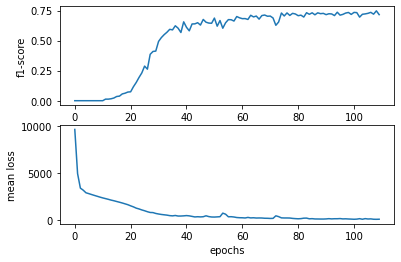

In [64]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2)
axs[0].plot(f1_history)
axs[1].plot(mean_loss_history_)
axs[0].set(ylabel='f1-score')
axs[1].set(xlabel='epochs', ylabel='mean loss')

## Salvando modelo

In [74]:
# torch.save(model.state_dict(), 'model/inference_ner_model_453acts_74.pt')
# torch.save(model, 'model/entire_ner_model453acts_74.pt')

## Carregando o modelo

In [100]:
from nltk.tokenize import word_tokenize

In [170]:
modo = 'inference'

if modo == 'inference':
    model.load_state_dict(torch.load('model/inference_ner_model_453acts_74.pt'))
else:
    model = torch.load('model/entire_ner_model453acts_74.pt')

In [171]:
model.eval()

bilstm_crf(
  (embedding): Embedding(5806, 50, padding_idx=1)
  (bilstm): LSTM(50, 200, num_layers=2, batch_first=True, dropout=0.25, bidirectional=True)
  (linear): Linear(in_features=400, out_features=23, bias=True)
  (crf): CRF(num_tags=23)
)

## Utilização do modelo treinado para predição em novos dados e interface com usuário

Passos:


1.   Transformar as palavras do texto em indices utilizando o dicionario word2idx e converter para tensor
2.   Realizar as predições
3.   Realizar extração das entidades de acordo com as predições

### Passo 1: Transformar as palavras em indices utilizando word2idx

In [172]:
# text = word_tokenize('<BOS> AVISO DE ABERTURA DE LICITACAO PREGAO ELETRONICO No 34/2019. Processo: 001-001334/2019. Objeto: Registro de precos para eventual contratacao de servicos de organizacao de eventos e correlatos, a serem realizados nas dependencias internas e externas da Camara Legislativa do Distrito Federal, sob demanda, abrangendo o planejamento operacional, apoio logistico, organizacao, execucao, montagem de infraestrutura, fornecimento de bens e mao-de-obra, independentemente da prestacao de servicos concomitantes, utilizando mobiliario necessario e adequado, fornecimento de layouts para estandes e exposicoes, compreendendo a montagem, desmontagem, limpeza, manutencao, sonorizacao, iluminacao, instalacoes eletrica e equipamentos, conforme os requisitos e condicoes estabelecidos no Termo de Referencia - Anexo I, do Edital. Valor estimado: R$ 6.014.928,12. Data/hora da Sessao Publica: 25/10/2019. Local: Internet, no endereco www.comprasnet.gov.br. Tipo: menor preco global. O edital encontra-se nos enderecos: www.comprasnet.gov.br (UASG 974004) e www.cl.df.gov.br, no link transparencia. Maiores informacoes (61) 3348-8650. Brasilia/DF, 14 de outubro de 2019. DOUGLAS BRUNO GONCALVES DE LAET. <EOS>')
text = word_tokenize('<BOS> AVISO DE LICITAÇÃO PREGÃO ELETRÔNICO Nº 18/2022 - UASG 974002 A Pregoeira comunica aos interessados que a fim de atender a demanda do Jardim Botânico e Brasília - JBB, a Subsecretaria de Compras Governamentais - SCG/SPLAN/SEEC operacionalizará licitação do PE nº 18/2022 no sistema Comprasnet, cujo objeto é a aquisição de bomba com vazão, bomba hidráulica, motobomba, bloco de cimento, cimento, relê, disjuntor, mini contactor, etc, conforme especificações e condições estabelecidas no termo de referência constante do Anexo I do Edital. Valor total estimado: R$ 46.237,77. Tipo de Licitação: Menor Preço. Unidade Orçamentária: 150106; Programa de Trabalho: 18.122.8210.8517.9658. Elemento de despesa: 33.90.30 e 44.90.52. Fonte: 100 e 120. Abertura das propostas dia 21/02/2022, às 9h30min. Processo 00195-00000275/2021-73. O edital poderá ser retirado no endereço eletrônico: www.comprasgovernamentais.gov.br. Informações pelo e-mail: pregoeirosulog08@economia.df.gov.br Brasília/DF, 04 de fevereiro de 2022 RITA DE CÁSSIA GODINHO DE CAMPOS <EOS>')
# text = word_tokenize('<BOS> AVISO DE LICITAÇÃO PREGÃO ELETRÔNICO Nº 06/2022 Objeto: Contratação de empresa especializada para fornecimento de 13 (treze) notebooks de alta performance e prestação de garantia on site de 12 (doze) meses, para atendimento das demandas internas do Tribunal de Contas do Distrito Federal. Processo: 00600-00000249/2021-80-TCDF. Valor estimado: R$ 155.654,46; enquadramento: natureza 4.4.90.52.35 – Equipamentos e Material Permanente; classificação funcional e programática 01.126.8231.1471.0005 - Modernização de Sistema de Informação do TCDF; fonte de Recursos 100. Data limite de recebimento das propostas: 17/02/2022, às 14h30min. Cópia do Edital encontra-se à disposição no Serviço de Licitação, localizado no 2º Andar do Ed. Anexo do TCDF, telefone (61) 3314- 2742 ou pelos sítios: www.tc.df.gov.br e www.comprasnet.gov.br (UASG: 974003). A Sessão Pública será processada no sítio do ComprasNet, nos termos do Edital. Em atendimento à Lei Distrital nº 5.453/2015, as informações referentes ao certame também estão disponíveis no sítio www.tc.df.gov.br, link: Consulta Processo do TCDF. Brasília/DF, 02 de fevereiro de 2022 ALESSANDRA RIBEIRO ASTUTI Pregoeira <EOS>')
# text = word_tokenize('<BOS> AVISO DE ABERTURA PREGÃO ELETRÔNICO POR SRP Nº 33/2022 - UASG 926119 Objeto: Aquisição de material médico hospitalar CATETER INTRAVENOSO PERIFÉRICO 14G e outros, para atender a demanda da Secretaria de Saúde – DF, conforme especificações e quantitativos constantes no Anexo I do Edital. Processo 00060-00437454/2021-51. Total de 37 itens (Ampla concorrência e cotas destinadas às ME/EPPs). Valor Estimado: R$ 7.833.355,042. Cadastro das Propostas: a partir de 31/01/2022. Abertura das Propostas 10/02/2022, às 9h, horário de Brasília, no site www. net.gov.br. O Edital encontra-se disponibilizado, sem ônus, no site, ou, com ônus, no endereço: SRTVN, Quadra 701, Conjunto C, Edifício PO 700, 2º andar, sala: Central de Compras/DAQ/SUAG, CEP: 70.723-040 – Brasília/DF. PEDRO PAULO B.D.C. FLEURY Pregoeiro <EOS>')
print(' '.join(text))

< BOS > AVISO DE LICITAÇÃO PREGÃO ELETRÔNICO Nº 18/2022 - UASG 974002 A Pregoeira comunica aos interessados que a fim de atender a demanda do Jardim Botânico e Brasília - JBB , a Subsecretaria de Compras Governamentais - SCG/SPLAN/SEEC operacionalizará licitação do PE nº 18/2022 no sistema Comprasnet , cujo objeto é a aquisição de bomba com vazão , bomba hidráulica , motobomba , bloco de cimento , cimento , relê , disjuntor , mini contactor , etc , conforme especificações e condições estabelecidas no termo de referência constante do Anexo I do Edital . Valor total estimado : R $ 46.237,77 . Tipo de Licitação : Menor Preço . Unidade Orçamentária : 150106 ; Programa de Trabalho : 18.122.8210.8517.9658 . Elemento de despesa : 33.90.30 e 44.90.52 . Fonte : 100 e 120 . Abertura das propostas dia 21/02/2022 , às 9h30min . Processo 00195-00000275/2021-73 . O edital poderá ser retirado no endereço eletrônico : www.comprasgovernamentais.gov.br . Informações pelo e-mail : pregoeirosulog08 @ econ

In [173]:
num_text = torch.LongTensor([word2idx['<UNK>'] if word not in word2idx else word2idx[word] for word in text]).unsqueeze(dim=0)
mask = num_text != -1
num_text.shape, mask.shape

(torch.Size([1, 182]), torch.Size([1, 182]))

### Passo 2: Realizar predições

In [174]:
model = model.to('cpu')

In [175]:
y_pred = model.decode(num_text, mask)
y_pred = IOBify(y_pred, idx2tag)
for idx, (word, tag) in enumerate(zip(text, y_pred[0])):
    print(word, tag)
    if idx >= 20:
        break

< O
BOS O
> O
AVISO O
DE O
LICITAÇÃO O
PREGÃO B-MODALIDADE_LICITACAO
ELETRÔNICO I-MODALIDADE_LICITACAO
Nº O
18/2022 B-NUM_LICITACAO
- O
UASG O
974002 O
A O
Pregoeira O
comunica O
aos O
interessados O
que O
a O
fim O


### Passo 3: Realizar extração das entidades de acordo com as predições

In [176]:
def extract_entities(y_pred, text):
    inside_entity = False
    entity_type = ''
    entity = ''
    entities = []
    for word, tag in zip(text, y_pred[0]):
        if not inside_entity:
            if tag[0] == 'B':
                inside_entity = True
                entity = word
                entity_type = tag[2:]
        else:
            if tag[0] == 'B':
                entities.append((entity_type, entity))
                entity = word
                entity_type = tag[2:]
                inside_entity = True
            elif tag[0] == 'I':
                entity = entity + ' ' + word
                inside_entity = True
            else:
                entities.append((entity_type, entity))
                entity = ''
                entity_type = 'O'
                inside_entity = False
    return entities

entities = extract_entities(y_pred, text)

In [177]:
entities

[('MODALIDADE_LICITACAO', 'PREGÃO ELETRÔNICO'),
 ('NUM_LICITACAO', '18/2022'),
 ('OBJ_LICITACAO',
  'aquisição de bomba com vazão , bomba hidráulica , motobomba , bloco de cimento , cimento , relê , disjuntor , mini contactor , etc , conforme especificações e condições estabelecidas no termo de referência constante do Anexo I do Edital'),
 ('VALOR_ESTIMADO', '46.237,77'),
 ('DATA_ABERTURA', '21/02/2022'),
 ('SISTEMA_COMPRAS', 'www.comprasgovernamentais.gov.br')]

In [178]:
# https://www.investopedia.com/ask/answers/032615/what-are-some-examples-stratified-random-sampling.asp#:~:text=Stratified%20random%20sampling%20is%20a,into%20groups%20is%20called%20stratification.


# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedShuffleSplit.html